#Loading the data

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
from tqdm import tqdm

In [93]:
path = 'StarLightCurves_TRAIN.txt'
data_with_label = pd.read_fwf(path, header=None)
data_without_label = data_with_label.iloc[:, 1:]
sample = data_without_label.iloc[0]  # first sample of length 1024
sample = sample.tolist()

In [94]:
data_with_label.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,3.0,0.537303,0.531103,0.528503,0.529403,0.533603,0.540903,0.551103,0.564003,0.579603,...,0.547103,0.546903,0.545903,0.543903,0.541003,0.537203,0.532303,0.526403,0.519503,0.511403
1,3.0,0.588398,0.593898,0.599098,0.604098,0.608798,0.613397,0.617797,0.622097,0.626097,...,0.228799,0.237399,0.246499,0.256199,0.266499,0.277399,0.288799,0.300899,0.313599,0.326899
2,1.0,-0.049900,-0.041500,-0.033400,-0.025600,-0.018100,-0.010800,-0.003800,0.003000,0.009600,...,-0.185601,-0.173801,-0.161601,-0.149201,-0.136401,-0.123201,-0.109701,-0.095901,-0.081701,-0.067100
3,3.0,1.337005,1.319805,1.302905,1.286305,1.270005,1.254005,1.238304,1.223005,1.208104,...,1.278905,1.288905,1.298505,1.307705,1.316505,1.324905,1.332805,1.340205,1.347005,1.353205
4,3.0,0.769801,0.775301,0.780401,0.785101,0.789401,0.793301,0.796801,0.799901,0.802601,...,0.740801,0.742401,0.744501,0.747301,0.750701,0.754801,0.759501,0.765001,0.771301,0.778401


In [95]:
data_without_label.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.537303,0.531103,0.528503,0.529403,0.533603,0.540903,0.551103,0.564003,0.579603,0.597603,...,0.547103,0.546903,0.545903,0.543903,0.541003,0.537203,0.532303,0.526403,0.519503,0.511403
1,0.588398,0.593898,0.599098,0.604098,0.608798,0.613397,0.617797,0.622097,0.626097,0.630097,...,0.228799,0.237399,0.246499,0.256199,0.266499,0.277399,0.288799,0.300899,0.313599,0.326899
2,-0.049900,-0.041500,-0.033400,-0.025600,-0.018100,-0.010800,-0.003800,0.003000,0.009600,0.015900,...,-0.185601,-0.173801,-0.161601,-0.149201,-0.136401,-0.123201,-0.109701,-0.095901,-0.081701,-0.067100
3,1.337005,1.319805,1.302905,1.286305,1.270005,1.254005,1.238304,1.223005,1.208104,1.193504,...,1.278905,1.288905,1.298505,1.307705,1.316505,1.324905,1.332805,1.340205,1.347005,1.353205
4,0.769801,0.775301,0.780401,0.785101,0.789401,0.793301,0.796801,0.799901,0.802601,0.805101,...,0.740801,0.742401,0.744501,0.747301,0.750701,0.754801,0.759501,0.765001,0.771301,0.778401


In [96]:
path = 'StarLightCurves_TEST.txt'
data_test = pd.read_fwf(path, header=None)
data_test_without_label = data_test.iloc[:, 1:]
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,2.0,-0.569701,-0.567901,-0.565901,-0.563701,-0.561501,-0.559101,-0.556701,-0.554101,-0.551501,...,-0.518401,-0.521501,-0.525101,-0.529001,-0.533201,-0.537901,-0.543001,-0.548501,-0.554501,-0.560801
1,3.0,-0.528303,-0.520903,-0.512903,-0.504303,-0.494903,-0.485003,-0.474403,-0.463203,-0.451303,...,-0.673504,-0.670104,-0.664604,-0.656704,-0.646504,-0.633804,-0.618604,-0.600603,-0.579903,-0.556303
2,3.0,0.164201,0.181901,0.198601,0.214301,0.229001,0.242701,0.255501,0.267401,0.278401,...,0.233501,0.225401,0.217301,0.209201,0.201101,0.193101,0.185201,0.177301,0.169401,0.161701
3,1.0,0.321800,0.327001,0.332401,0.337901,0.343501,0.349201,0.355001,0.360801,0.366701,...,0.262200,0.268300,0.274400,0.280500,0.286600,0.292600,0.298600,0.304600,0.310500,0.316400
4,2.0,-0.461699,-0.464499,-0.466499,-0.467499,-0.467699,-0.467099,-0.465699,-0.463499,-0.460599,...,-0.465999,-0.465899,-0.466399,-0.467399,-0.468999,-0.471099,-0.473799,-0.477099,-0.480999,-0.485499


In [97]:
print(len(data_with_label)) #Number of train elements
print(len(data_test)) #Number of test elements

1000
8236


#Different classes

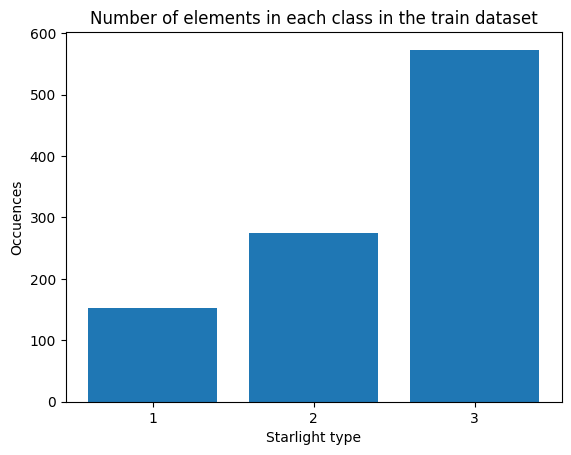

In [110]:
labels_train=data_with_label.iloc[:,0].tolist()
num1=labels_train.count(1.0)
num2=labels_train.count(2.0)
num3=labels_train.count(3.0)
n=num1+num2+num3

occurences= [num1,num2,num3]
labels=['1','2','3']
plt.bar(labels,occurences)
plt.xlabel("Starlight type")
plt.ylabel("Occuences")
plt.title("Number of elements in each class in the train dataset")
plt.show()

In [111]:
print(num1/n*100)
print(num2/n*100)
print(num3/n*100)

15.2
27.500000000000004
57.3


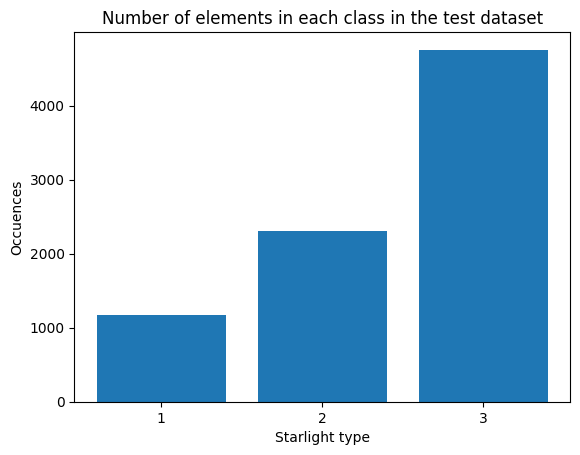

In [112]:
labels_train=data_test.iloc[:,0].tolist()
num1=labels_train.count(1.0)
num2=labels_train.count(2.0)
num3=labels_train.count(3.0)
n=num1+num2+num3

occurences= [num1,num2,num3]
labels=['1','2','3']
plt.bar(labels,occurences)
plt.xlabel("Starlight type")
plt.ylabel("Occuences")
plt.title("Number of elements in each class in the test dataset")
plt.show()

In [113]:
print(num1/n*100)
print(num2/n*100)
print(num3/n*100)

14.29091792132103
27.98688683827101
57.72219524040797


In [100]:
data_with_label.loc[data_with_label[0] == 2]

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
5,2.0,-0.411201,-0.419301,-0.426101,-0.431801,-0.436301,-0.439601,-0.441901,-0.443101,-0.443401,...,-0.425001,-0.426901,-0.429601,-0.433101,-0.437401,-0.442601,-0.448701,-0.455801,-0.463801,-0.472801
7,2.0,-0.643901,-0.648701,-0.653201,-0.657501,-0.661501,-0.665401,-0.669001,-0.672301,-0.675501,...,-0.643001,-0.641801,-0.640601,-0.639601,-0.638601,-0.637801,-0.637101,-0.636501,-0.636101,-0.635801
10,2.0,-0.706298,-0.700498,-0.694898,-0.689498,-0.684298,-0.679298,-0.674398,-0.669698,-0.665198,...,-0.715398,-0.714698,-0.714098,-0.713598,-0.713298,-0.713098,-0.712998,-0.713098,-0.713398,-0.713798
17,2.0,-0.511500,-0.505900,-0.500500,-0.495300,-0.490200,-0.485400,-0.480800,-0.476300,-0.472100,...,-0.507200,-0.500700,-0.493800,-0.486500,-0.478800,-0.470800,-0.462500,-0.453800,-0.444900,-0.435700
19,2.0,-0.616601,-0.636801,-0.656001,-0.674201,-0.691401,-0.707701,-0.723001,-0.737401,-0.750901,...,-0.612401,-0.613101,-0.614001,-0.615101,-0.616401,-0.618001,-0.619901,-0.622001,-0.624401,-0.627101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2.0,-0.385301,-0.377801,-0.370401,-0.363301,-0.356501,-0.349901,-0.343501,-0.337401,-0.331501,...,-0.316501,-0.321301,-0.326101,-0.330901,-0.335901,-0.340801,-0.345801,-0.350901,-0.355901,-0.360901
989,2.0,-0.840498,-0.836498,-0.832698,-0.828998,-0.825498,-0.822098,-0.818798,-0.815698,-0.812698,...,-0.826898,-0.827898,-0.829098,-0.830498,-0.832098,-0.833798,-0.835798,-0.837998,-0.840398,-0.842998
992,2.0,-0.074200,-0.089400,-0.104000,-0.118200,-0.131900,-0.145100,-0.157800,-0.169900,-0.181600,...,-0.195500,-0.186200,-0.176400,-0.166100,-0.155200,-0.143800,-0.131800,-0.119300,-0.106200,-0.092500
993,2.0,-0.830002,-0.838102,-0.844802,-0.850002,-0.853802,-0.856202,-0.857402,-0.857302,-0.856002,...,-0.662402,-0.668202,-0.674002,-0.679902,-0.685902,-0.691802,-0.697802,-0.703902,-0.710002,-0.716002


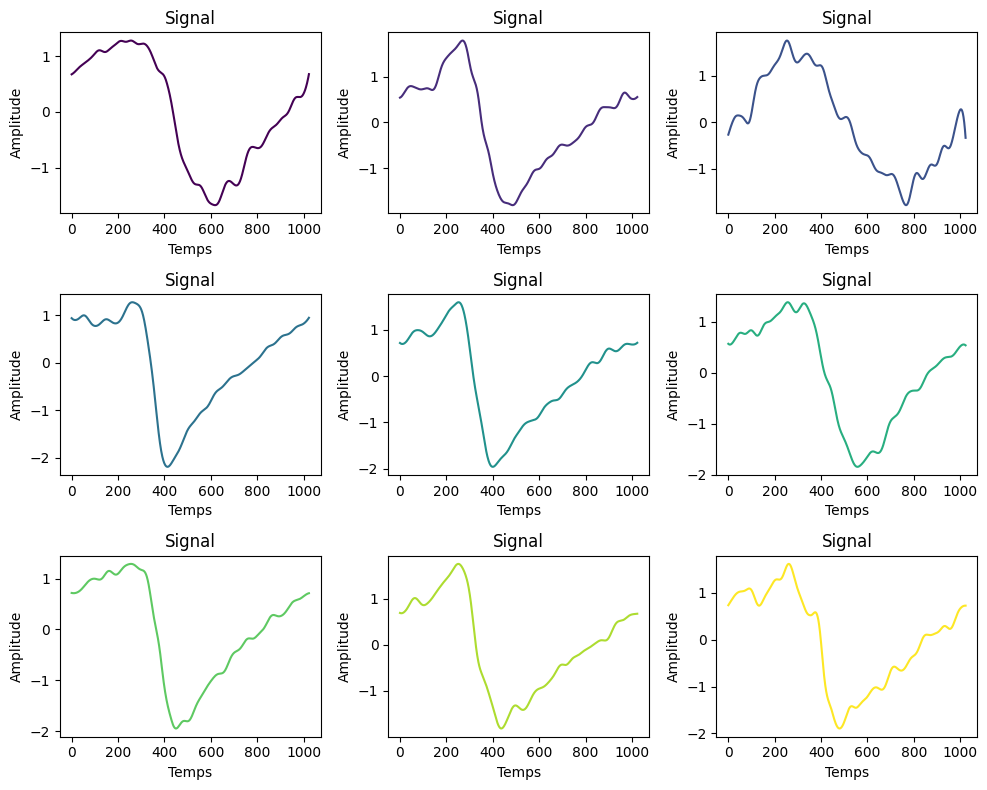

In [101]:
def plot_hist(n, index,l):
  if n%l==0:
    r=n//l
  else:
    r=n//l +1
  fig, axs = plt.subplots(r, l, figsize=(10, 8))
  colors = plt.cm.viridis(np.linspace(0, 1, n))
  df = data_with_label.loc[data_with_label[0] == index]
  for i in range(n):
    j = rd.randint(0, len(df) - 1)  # Fix: Ensure index is within bounds

    sample = df.iloc[j, 1:]  # Fix: Selecting values from the second column onwards
    sample = sample.tolist()
    row = i // l
    col = i %l
    axs[row,col].plot(sample, color=colors[i])
    axs[row,col].set_xlabel('Temps')  # Fix: Set xlabel for the second subplot
    axs[row,col].set_ylabel('Amplitude')
    axs[row,col].set_title('Signal')

  plt.tight_layout()
  plt.show()

plot_hist(n=9,index=3,l=3)

In [102]:
df1 = data_with_label.loc[data_with_label[0] == 1]
df2 = data_with_label.loc[data_with_label[0] == 2]
df3 = data_with_label.loc[data_with_label[0] == 3]

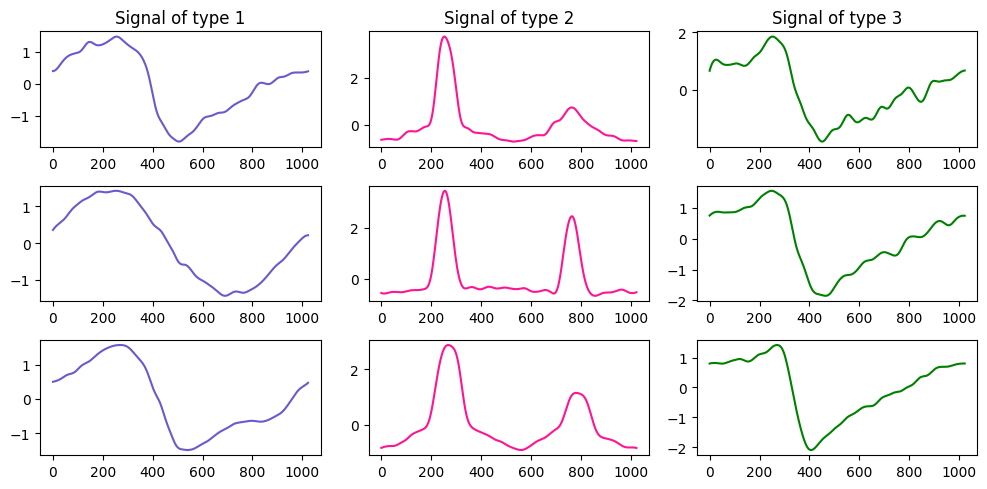

In [125]:
def plot_signals(n):
  fig, axs = plt.subplots(n, 3, figsize=(10,5))
  #colors = plt.cm.viridis(np.linspace(0, 1, n))
  colors=["slateblue","deeppink","green"]
  for i in range(n):
    for col in range(1,4):
      df = data_with_label.loc[data_with_label[0] == col]
      j = rd.randint(0, len(df) - 1)

      sample= df.iloc[j, 1:]
      sample = sample.tolist()

      axs[i,col-1].plot(sample, color=colors[col-1])
      #axs[0,col-1].set_xlabel('Time')  # Fix: Set xlabel for the second subplot
      #axs[0,col-1].set_ylabel('Amplitude')
      axs[0,col-1].set_title(f'Signal of type {col}')

  plt.tight_layout()
  plt.show()

plot_signals(n=3)